Nolan Roth <br>
PHYS 434 AC <br>
## Homework #2

In [10]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np

plt.rcParams["figure.figsize"] = (10, 5)

### 1)

Probability of rolling a 1 for one die is *1/6*, so probability of rolling snake eyes is *(1/6)^2* or *1/36*.

In [5]:
prob1 = 1/36

There are 6 possible ways of rolling a sum of 7 out of 36 possible rolls. So the probability of rolling a sum of 7 is *6/36* or *1/6*.

In [3]:
prob2 = 1/6

The ratio of rolling snake eyes to rolling a sum of 7 is 0.16667. 

In [4]:
print(prob1/prob2)

0.16666666666666666


### 2)

Finding the sum probabilities analytically: <br>
Sum of 2: 1+1 => *1/36* <br>
Sum of 3: 1+2, 2+1 => 2/36 = *1/18* <br>
Sum of 4: 1+3, 2+2, 3+1 => 3/36 = *1/12* <br>
Sum of 5: 1+4, 2+3, 3+2, 4+1 => 4/36 = *1/9* <br>
Sum of 6: 1+5, 2+4, 3+3, 4+2, 5+1 => *5/36* <br>
Sum of 7: 1+6, 2+5, 3+4, 4+3, 5+2, 6+1 => 6/36 = *1/6* <br>
Sum of 8: 2+6, 3+5, 4+4, 5+3, 6+2 => *5/36* <br>
Sum of 9: 3+6, 4+5, 5+4, 6+3 => 4/36 = *1/9* <br>
Sum of 10: 4+6, 5+5, 6+4 => 3/36 = *1/12* <br>
Sum of 11: 5+6, 6+5 => 2/36 = *1/18* <br>
Sum of 12: 6+6 => *1/36*

Finding the sum probabilities numerically:

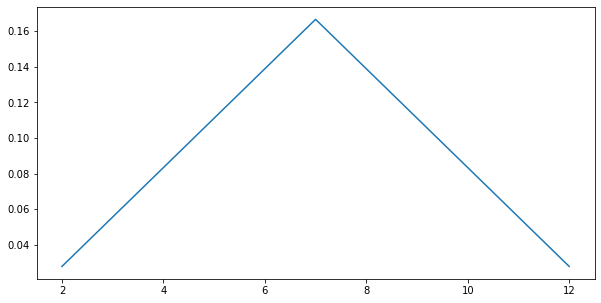

In [119]:
x = np.linspace(2, 12, 11)
y = scipy.signal.fftconvolve([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
plt.plot(x, y)
plt.show()

### 3)

In [149]:
x = np.linspace(2, 12, 11)
y = scipy.signal.fftconvolve([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
mean = 0
for i in range(11):
    mean += (y[i] * x[i])
print('Average = ' + str(z))
z2 = 0
for i in range(11):
    z2 += y[i] * x[i]** 2
var = z2 - mean** 2
print('Variance = ' + str(var))

Average = 7.0
Variance = 5.833333333333336


These results makes sense considering we know a sum of 7 is the most likely value and the probabilities of values to both the left and right fall off in a symmetrical manner so that 7 should be the mean.

### 4)

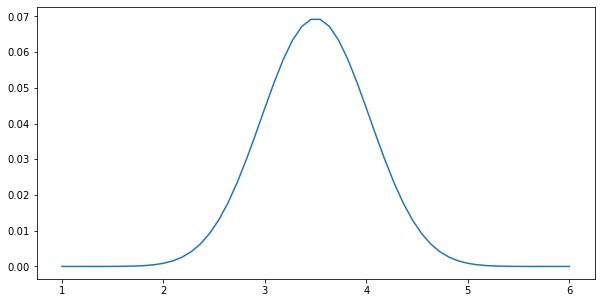

In [150]:
x = np.linspace(1, 6, 56)
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
r = p
for i in range(10):
    r = scipy.signal.fftconvolve(r, p, 'full')
plt.plot(x, r)
plt.show()

This appears to be a Gaussian distribution. We can check more closely by plotting the log of the distribution.

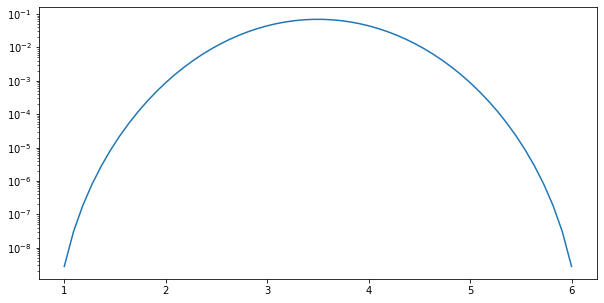

In [151]:
plt.plot(x, r)
plt.yscale('Log')
plt.show()

This log plot looks like the downward parabola that we would expect of a Gaussian log plot. This means this distribution is most likely Gaussian or at least very close to be being Gaussian. If we were to average more than 10 dice, we would get a distribution that is even more Gaussian.